# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

### <font color='brown'>워드클라우드 : 윤석열대통령 2022년 취임사</font>
>    
> - 청와대 : https://www.president.go.kr/ko/greeting_new.php
> - 과제1. 윤석열대통령 연설문을 크롤링 
> - 과제2. 의미없는 글자는 필터링 후 워드클라우드 생성

In [1]:
# from images import bigpycraft_bda as bpc
from IPython.display import Image 

In [2]:
from konlpy.tag import Hannanum
from lxml import html
from collections import Counter
from urllib.request import urlopen

import sys
import random
import webbrowser
import pytagcloud 

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# %pip install pytagcloud

In [4]:
# %pip install pygame

In [5]:
# %pip install simplejson

In [6]:
rndno = lambda: random.randint(0, 255)
color = lambda: (rndno(), rndno(), rndno())

In [7]:
color()

(90, 168, 59)

In [8]:
def get_tags(text, ntags=50, multiplier=10):
    hannanum = Hannanum()
    nouns = hannanum.nouns(text)
    count = Counter(nouns)
    return [
        {'color' : color(),
         'tag' : n,
         'size' : c*multiplier,
        }
        for n, c in count.most_common(ntags)
    ]


In [9]:
def draw_cloud(tags, filename, fontname='Korean', size=(800, 600)):
    pytagcloud.create_tag_image(tags, filename, fontname=fontname, size=size)
    # webbrowser.open(filename)

In [10]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [11]:
url = 'https://www.president.go.kr/ko/greeting_new.php'
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
soup.title

<title>제20대 대통령실 &gt; 국민의 대통령 &gt; 윤석열 대통령</title>

In [12]:
print(str(soup)[:1000])

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, user-scalable=yes, viewport-fit=cover" name="viewport"/>
<title>제20대 대통령실 &gt; 국민의 대통령 &gt; 윤석열 대통령</title>
<meta content="대한민국대통령, 윤석열, 윤석열 당선인, 윤석열 대통령, 제20대 대통령, 대통령실, 청와대, 국민속으로 용산시대, 국민의 대통령, 윤대통령, 제20대 대통령 윤석열" name="keyword"/>
<meta content="다시 대한민국 새로운 국민의 나라" name="description"/>
<meta content="대한민국 제20대 대통령 윤석열" property="og:title"/>
<meta content="https://www.president.go.kr/index.php" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="https://www.president.go.kr/thumb_img.jpg" property="og:image"/>
<meta content="대한민국 제20대 대통령 윤석열" property="og:site_name"/>
<meta content="다시 대한민국 새로운 국민의 나라" property="og:description"/>
<meta content="f160274b37f75d8d40b6e2580c4c30e6001d8f49" name="naver-site-verification"/>
<link href="https://www.president.go.kr/" rel="canonical"/>
<link href="https://www.presiden

In [13]:
# <div class="text left cb text_wrap motion fadeIn visible" data-animation="fadeIn">
# speech = soup.find('div', 'text left cb text_wrap motion fadeIn visible')
# speech = soup.find_all('div', 'cs_body')
speech = soup.find('div', 'gre')
speech

<div class="gre">
<div class="inner">
<div class="pic" data-aos="fade-up" data-aos-delay="0"></div>
<div class="wrap" data-aos="fade-up" data-aos-delay="0">
<div class="title">
						존경하고 사랑하는 국민 여러분,<br/>
						750만 재외동포 여러분<br/>
						그리고 자유를 사랑하는 세계 시민 여러분
					</div>
<div class="txt">
						저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로<br/>
						국민이 진정한 주인인 나라로 재건하고,<br/>
						국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고<br/>
						오늘 이 자리에 섰습니다.<br/>
<br/>
						역사적인 자리에 함께 해주신 국민 여러분께 감사드립니다.<br/>
<br/>
						문재인, 박근혜 전 대통령,<br/>
						그리고 할리마 야콥 싱가포르 대통령,<br/>
						포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령,<br/>
						왕치산 중국 국가부주석,<br/>
						메가와티 수카르노푸트리 인도네시아 전 대통령,<br/>
						더글러스 엠호프 해리스 미국 부통령 부군,<br/>
						조지 퓨리 캐나다 상원의장,<br/>
						하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과<br/>
						내외 귀빈 여러분께도 깊이 감사드립니다.<br/>
<br/>
						이 자리를 빌려 지난 2년간 코로나 펜데믹을 극복하는 과정에서<br/>
						큰 고통을 감내해주신 국민 여러분께 경의를 표합니다.<br/>
						그리고 헌신해주신 의료진 여러분께도 감사드립니다.<br/>
<br/>
						존경하는 국민 여러분<br/>
						세계 시민 여러분<br/>
<br/>
						지금 전

In [14]:
speech_txt = speech.get_text()
speech_txt

'\n\n\n\n\r\n\t\t\t\t\t\t존경하고 사랑하는 국민 여러분,\r\n\t\t\t\t\t\t750만 재외동포 여러분\r\n\t\t\t\t\t\t그리고 자유를 사랑하는 세계 시민 여러분\r\n\t\t\t\t\t\n\r\n\t\t\t\t\t\t저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로\r\n\t\t\t\t\t\t국민이 진정한 주인인 나라로 재건하고,\r\n\t\t\t\t\t\t국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고\r\n\t\t\t\t\t\t오늘 이 자리에 섰습니다.\n\r\n\t\t\t\t\t\t역사적인 자리에 함께 해주신 국민 여러분께 감사드립니다.\n\r\n\t\t\t\t\t\t문재인, 박근혜 전 대통령,\r\n\t\t\t\t\t\t그리고 할리마 야콥 싱가포르 대통령,\r\n\t\t\t\t\t\t포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령,\r\n\t\t\t\t\t\t왕치산 중국 국가부주석,\r\n\t\t\t\t\t\t메가와티 수카르노푸트리 인도네시아 전 대통령,\r\n\t\t\t\t\t\t더글러스 엠호프 해리스 미국 부통령 부군,\r\n\t\t\t\t\t\t조지 퓨리 캐나다 상원의장,\r\n\t\t\t\t\t\t하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과\r\n\t\t\t\t\t\t내외 귀빈 여러분께도 깊이 감사드립니다.\n\r\n\t\t\t\t\t\t이 자리를 빌려 지난 2년간 코로나 펜데믹을 극복하는 과정에서\r\n\t\t\t\t\t\t큰 고통을 감내해주신 국민 여러분께 경의를 표합니다.\r\n\t\t\t\t\t\t그리고 헌신해주신 의료진 여러분께도 감사드립니다.\n\r\n\t\t\t\t\t\t존경하는 국민 여러분\r\n\t\t\t\t\t\t세계 시민 여러분\n\r\n\t\t\t\t\t\t지금 전 세계는 팬데믹 위기, 교역 질서의 변화와 공급망의 재편,\r\n\t\t\t\t\t\t기후 변화, 식량과 에너지 위기, 분쟁의 평화적 해결의 후퇴 등\r\n\t\t\t\t\t\t

In [15]:
speech_txt = speech_txt.replace('\n', ' ')
speech_txt = speech_txt.replace('\r', ' ')
speech_txt = speech_txt.replace('\t', ' ')
speech_txt = speech_txt.replace('\xa0', ' ')
speech_txt = speech_txt.strip()
speech_txt

'존경하고 사랑하는 국민 여러분,        750만 재외동포 여러분        그리고 자유를 사랑하는 세계 시민 여러분                저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로        국민이 진정한 주인인 나라로 재건하고,        국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고        오늘 이 자리에 섰습니다.         역사적인 자리에 함께 해주신 국민 여러분께 감사드립니다.         문재인, 박근혜 전 대통령,        그리고 할리마 야콥 싱가포르 대통령,        포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령,        왕치산 중국 국가부주석,        메가와티 수카르노푸트리 인도네시아 전 대통령,        더글러스 엠호프 해리스 미국 부통령 부군,        조지 퓨리 캐나다 상원의장,        하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과        내외 귀빈 여러분께도 깊이 감사드립니다.         이 자리를 빌려 지난 2년간 코로나 펜데믹을 극복하는 과정에서        큰 고통을 감내해주신 국민 여러분께 경의를 표합니다.        그리고 헌신해주신 의료진 여러분께도 감사드립니다.         존경하는 국민 여러분        세계 시민 여러분         지금 전 세계는 팬데믹 위기, 교역 질서의 변화와 공급망의 재편,        기후 변화, 식량과 에너지 위기, 분쟁의 평화적 해결의 후퇴 등        어느 한 나라가 독자적으로, 또는 몇몇 나라만 참여해서 해결하기 어려운        난제들에 직면해 있습니다.         다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다.         또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업, 양극화의 심화와 다양한 사회적 갈등으로 인해        공동체의 결속력이 흔들리고 와해되고 있습니다.         

In [16]:
speech_tags = get_tags(speech_txt)
speech_tags

[{'color': (112, 178, 251), 'tag': '자유', 'size': 290},
 {'color': (21, 121, 174), 'tag': '여러분', 'size': 160},
 {'color': (123, 215, 12), 'tag': '국민', 'size': 150},
 {'color': (244, 216, 1), 'tag': '시민', 'size': 150},
 {'color': (60, 220, 131), 'tag': '세계', 'size': 130},
 {'color': (246, 242, 27), 'tag': '우리', 'size': 130},
 {'color': (180, 103, 174), 'tag': '것', 'size': 120},
 {'color': (225, 123, 98), 'tag': '수', 'size': 100},
 {'color': (56, 129, 209), 'tag': '평화', 'size': 100},
 {'color': (129, 100, 26), 'tag': '저', 'size': 80},
 {'color': (246, 31, 124), 'tag': '위', 'size': 80},
 {'color': (160, 67, 67), 'tag': '해결', 'size': 80},
 {'color': (18, 244, 236), 'tag': '존경', 'size': 70},
 {'color': (184, 131, 73), 'tag': '가치', 'size': 70},
 {'color': (92, 132, 104), 'tag': '국제사회', 'size': 60},
 {'color': (178, 195, 62), 'tag': '문제', 'size': 60},
 {'color': (217, 58, 30), 'tag': '나라', 'size': 50},
 {'color': (18, 217, 90), 'tag': '전', 'size': 50},
 {'color': (132, 154, 149), 'tag': '대통령',

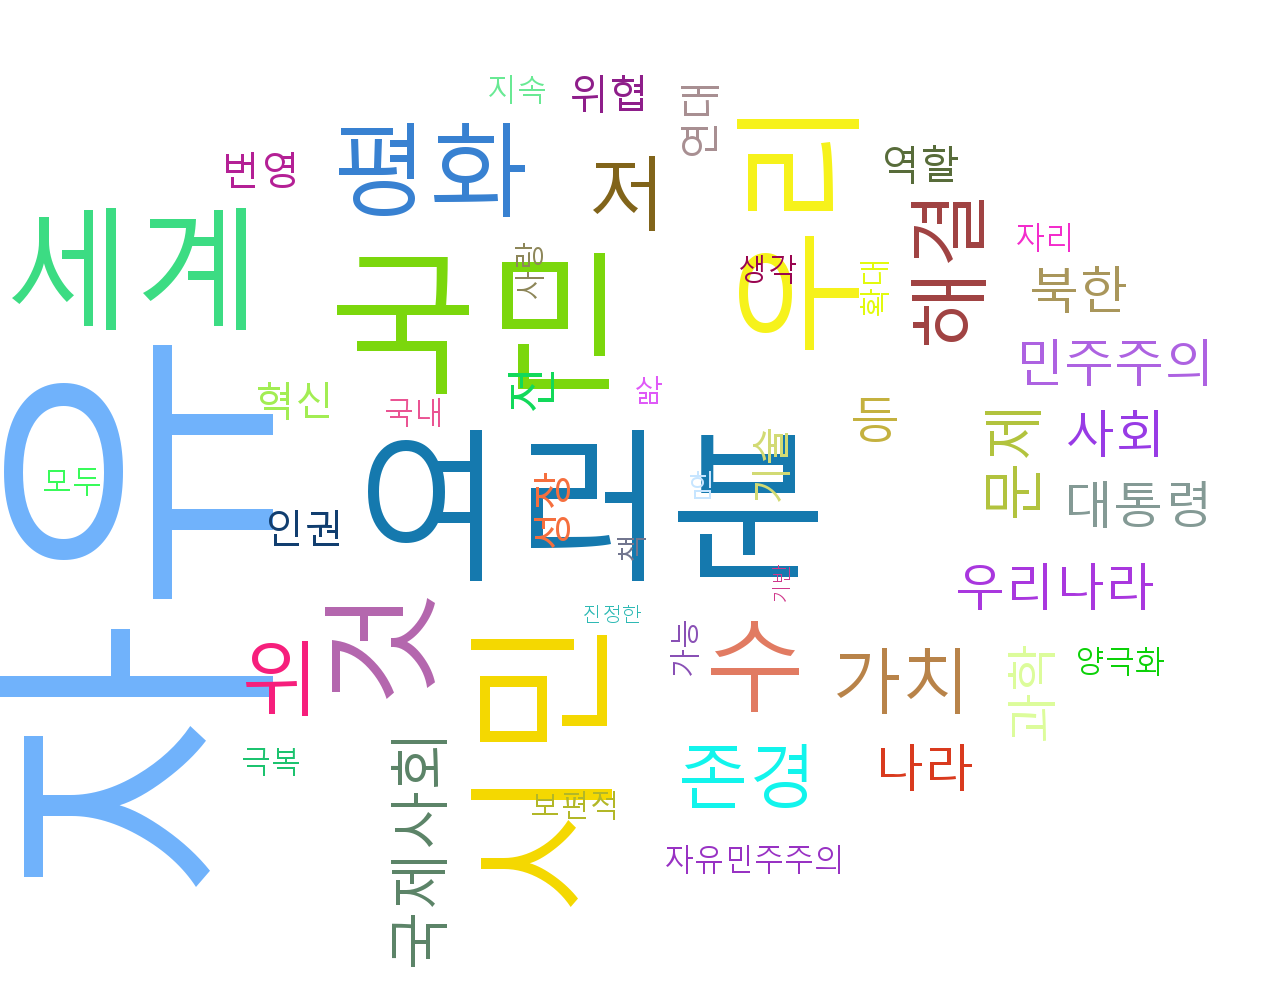

In [17]:
img_wordcloud = 'wordcloud/yoon_speech_2022.png'
draw_cloud(speech_tags, img_wordcloud, fontname='Korean', size=(1400, 1000))
Image(img_wordcloud)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>